In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import time as t
import plotly.graph_objects as go
sns.set()


In [4]:
usdcoin= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\usdcoin.csv')

In [5]:
usdcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          1327 non-null   object 
 1   PRECIO-usd      1327 non-null   float64
 2   MARKET_CAP-usd  1327 non-null   float64
 3   TOTAL_VOLUMES   1327 non-null   float64
 4   COIN_ID         1327 non-null   object 
dtypes: float64(3), object(2)
memory usage: 52.0+ KB


In [6]:
usdcoin.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,1327.000000,1.327000e+03,1.327000e+03
mean,1.000387,2.616185e+10,2.872488e+09
std,0.002370,1.963178e+10,3.737875e+09
min,0.965578,4.204296e+08,2.153194e+08
25%,0.999497,2.955534e+09,8.858121e+08
50%,1.000250,2.794818e+10,2.484800e+09
75%,1.001285,4.383191e+10,3.949497e+09
max,1.010989,5.615979e+10,1.102918e+11


In [7]:
usdcoin['FECHAS']=pd.to_datetime(usdcoin['FECHAS'])

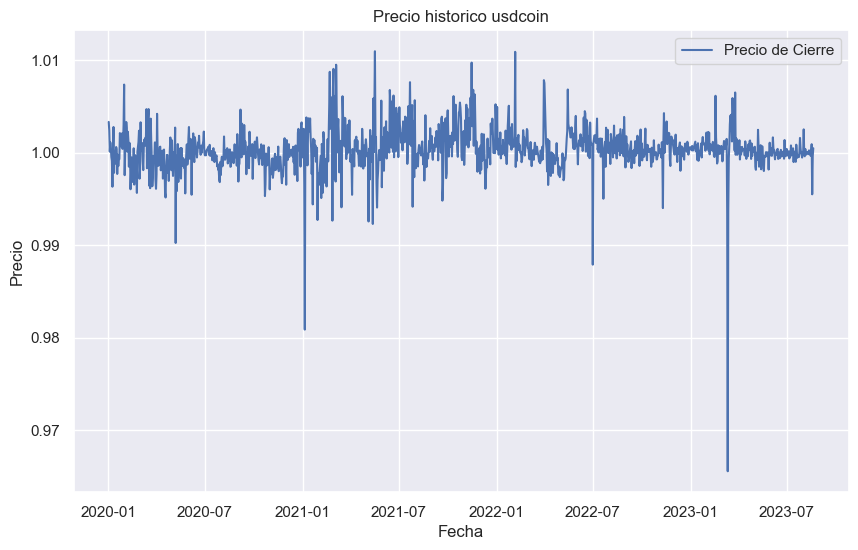

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(usdcoin['FECHAS'], usdcoin['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico usdcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

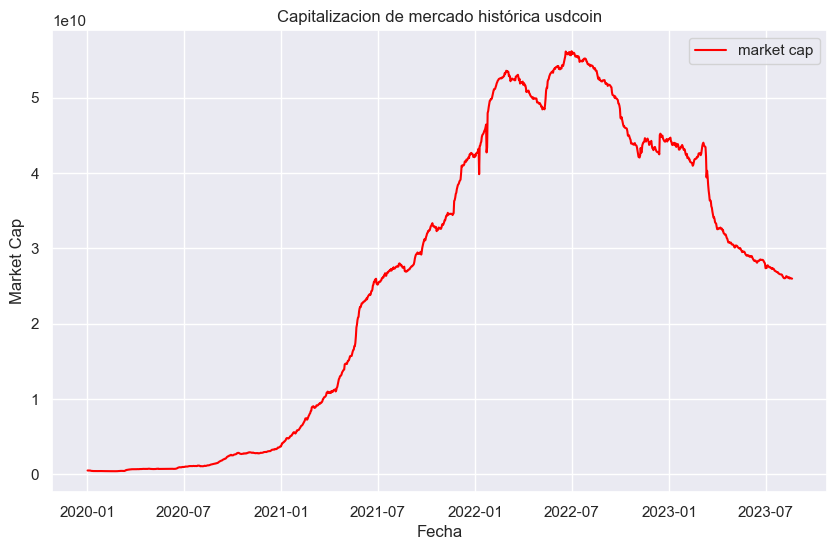

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(usdcoin['FECHAS'], usdcoin['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica usdcoin')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

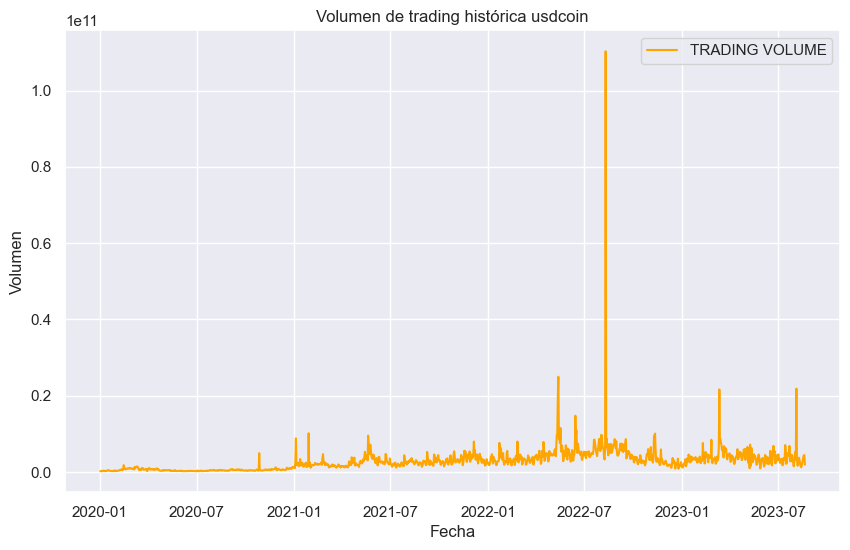

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(usdcoin['FECHAS'], usdcoin['TOTAL_VOLUMES'], label='TRADING VOLUME', color='orange')
plt.title('Volumen de trading histórica usdcoin')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(usdcoin['PRECIO-usd'], window=rsi_period)
usdcoin['RSI'] = indicator.rsi()

usdcoin.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
1322,2023-08-16,0.999975,2.603284e+10,3.215612e+09,usd-coin,49.545438
1323,2023-08-17,1.000939,2.608557e+10,3.877504e+09,usd-coin,56.196396
1324,2023-08-18,0.995522,2.601172e+10,4.416274e+09,usd-coin,31.266037
1325,2023-08-19,0.999658,2.599099e+10,4.443167e+09,usd-coin,49.636526
1326,2023-08-20,1.000504,2.598605e+10,1.939243e+09,usd-coin,52.438145


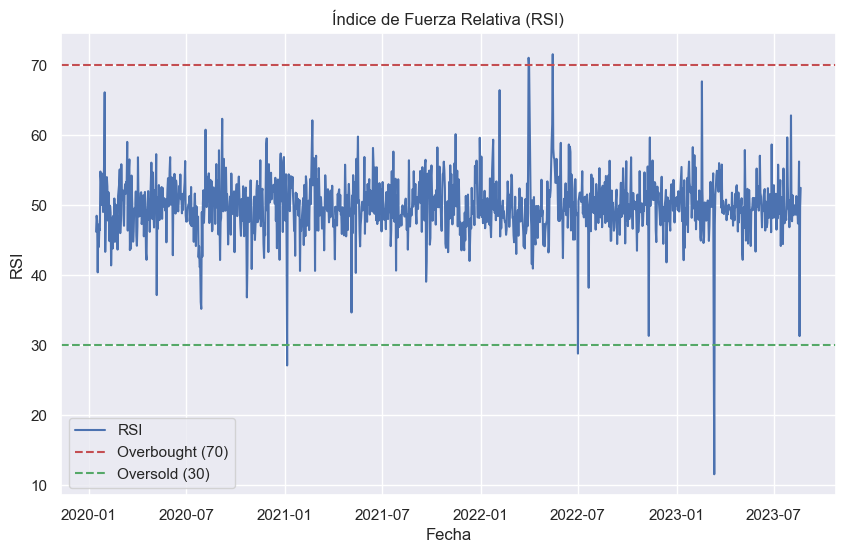

In [12]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(usdcoin['FECHAS'], usdcoin['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
rolling_window = 50
usdcoin['MovingAverage'] = usdcoin['PRECIO-usd'].rolling(window=rolling_window).mean()

print(usdcoin.head())

      FECHAS  PRECIO-usd  MARKET_CAP-usd  TOTAL_VOLUMES   COIN_ID  RSI  \
0 2020-01-02    1.003346    5.202078e+08   2.156181e+08  usd-coin  NaN   
1 2020-01-03    1.002434    5.199155e+08   2.725911e+08  usd-coin  NaN   
2 2020-01-04    1.000130    5.188404e+08   3.194660e+08  usd-coin  NaN   
3 2020-01-05    1.001133    5.189525e+08   2.337284e+08  usd-coin  NaN   
4 2020-01-06    1.000500    5.179733e+08   2.434995e+08  usd-coin  NaN   

   MovingAverage  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


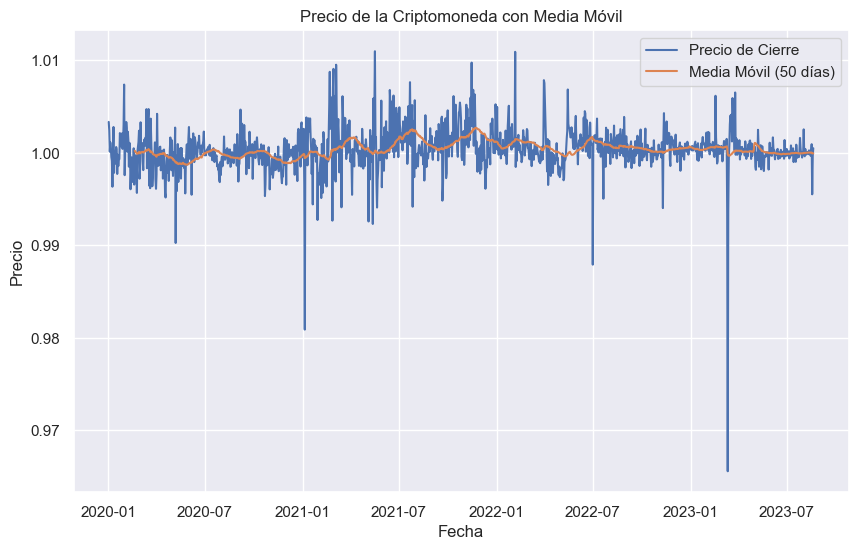

In [14]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(usdcoin['FECHAS'], usdcoin['PRECIO-usd'], label='Precio de Cierre')
plt.plot(usdcoin['FECHAS'], usdcoin['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()